In [15]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

#Number of subprocesses to be used for data loading
numworkers = 0

batch_size = 20
valid_size = 0.2

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(num_train * valid_size))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

transform = transforms.ToTensor()

train_data = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler = train_sampler)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler = valid_sampler)

test_data = datasets.MNIST('MNIST_data/', download=True, train=False, transform = transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)


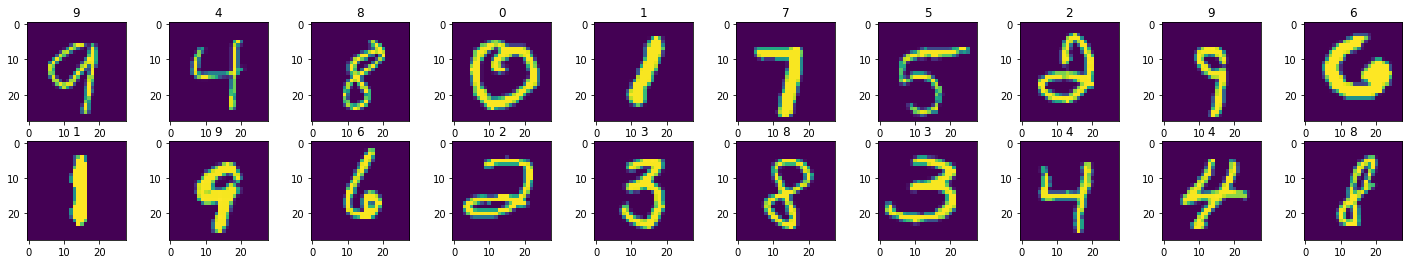

In [13]:
#Plot some images
images, labels = next(iter(train_loader))
images = images.numpy().squeeze()

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1)
    ax.imshow(images[idx])
    ax.set_title(str(labels[idx].item()))

In [14]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [16]:
#Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 30
valid_loss_min = np.Inf

for epoch in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    #Training Loop
    for data, target in train_loader :
        
        optimizer.zero_grad()
        
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)
        
    #Validation Loop
    for data, target in valid_loader :
        
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    
    #Average loss over an epoch
    training_loss = train_loss/len(train_loader.dataset)
    validation_loss = valid_loss/len(valid_loader.dataset)
    
    print('--Epoch {}---'.format(epoch+1))
    print('Training Loss : {}, Validation Loss : {}'.format(training_loss, validation_loss))
    
    if validation_loss < valid_loss_min :
        print('Validation Loss decreased from {} ---> {}. Saving model...'.format(valid_loss_min, validation_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = validation_loss
        

--Epoch 1---
Training Loss : 0.912194248576959, Validation Loss : 0.1069345643868049
Validation Loss decreased from inf ---> 0.1069345643868049. Saving model...
--Epoch 2---
Training Loss : 0.3610670962234338, Validation Loss : 0.07731006616850694
Validation Loss decreased from 0.1069345643868049 ---> 0.07731006616850694. Saving model...
--Epoch 3---
Training Loss : 0.27939889826004705, Validation Loss : 0.06447182033459345
Validation Loss decreased from 0.07731006616850694 ---> 0.06447182033459345. Saving model...
--Epoch 4---
Training Loss : 0.23650091570802034, Validation Loss : 0.055969428931673365
Validation Loss decreased from 0.06447182033459345 ---> 0.055969428931673365. Saving model...
--Epoch 5---
Training Loss : 0.20404277274323007, Validation Loss : 0.04981514921039343
Validation Loss decreased from 0.055969428931673365 ---> 0.04981514921039343. Saving model...
--Epoch 6---
Training Loss : 0.18017448659458507, Validation Loss : 0.046546663168196875
Validation Loss decreased

In [17]:
#Load the saved model
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [18]:
#Test the model
accuracy = 0
test_loss = 0
batch_num = 0
for data, labels in test_loader:
    
    batch_num += 1
    output = model(data)
    test_loss += criterion(output, labels)
    preds = np.argmax(output.detach().numpy(), axis=1)
    equals = preds == labels.numpy()
    curr_accuracy = equals.mean()
    print("Accuracy on batch {} : {}".format(batch_num, curr_accuracy))
    accuracy += curr_accuracy

print('Test Loss : {}'.format(test_loss/len(test_loader)))
print('Overall Accuracy : {}'.format(accuracy/len(test_loader)))

Accuracy on batch 1 : 0.95
Accuracy on batch 2 : 1.0
Accuracy on batch 3 : 1.0
Accuracy on batch 4 : 1.0
Accuracy on batch 5 : 1.0
Accuracy on batch 6 : 1.0
Accuracy on batch 7 : 1.0
Accuracy on batch 8 : 0.95
Accuracy on batch 9 : 1.0
Accuracy on batch 10 : 1.0
Accuracy on batch 11 : 1.0
Accuracy on batch 12 : 0.95
Accuracy on batch 13 : 0.9
Accuracy on batch 14 : 1.0
Accuracy on batch 15 : 0.95
Accuracy on batch 16 : 1.0
Accuracy on batch 17 : 0.95
Accuracy on batch 18 : 0.95
Accuracy on batch 19 : 1.0
Accuracy on batch 20 : 0.95
Accuracy on batch 21 : 1.0
Accuracy on batch 22 : 1.0
Accuracy on batch 23 : 0.9
Accuracy on batch 24 : 1.0
Accuracy on batch 25 : 0.95
Accuracy on batch 26 : 1.0
Accuracy on batch 27 : 0.95
Accuracy on batch 28 : 1.0
Accuracy on batch 29 : 1.0
Accuracy on batch 30 : 0.9
Accuracy on batch 31 : 0.9
Accuracy on batch 32 : 0.95
Accuracy on batch 33 : 0.95
Accuracy on batch 34 : 1.0
Accuracy on batch 35 : 0.95
Accuracy on batch 36 : 0.95
Accuracy on batch 37 : 0

Accuracy on batch 293 : 0.9
Accuracy on batch 294 : 0.95
Accuracy on batch 295 : 0.95
Accuracy on batch 296 : 1.0
Accuracy on batch 297 : 0.8
Accuracy on batch 298 : 0.95
Accuracy on batch 299 : 0.9
Accuracy on batch 300 : 0.95
Accuracy on batch 301 : 0.95
Accuracy on batch 302 : 1.0
Accuracy on batch 303 : 0.95
Accuracy on batch 304 : 1.0
Accuracy on batch 305 : 0.9
Accuracy on batch 306 : 0.95
Accuracy on batch 307 : 1.0
Accuracy on batch 308 : 1.0
Accuracy on batch 309 : 0.85
Accuracy on batch 310 : 1.0
Accuracy on batch 311 : 1.0
Accuracy on batch 312 : 1.0
Accuracy on batch 313 : 1.0
Accuracy on batch 314 : 1.0
Accuracy on batch 315 : 1.0
Accuracy on batch 316 : 1.0
Accuracy on batch 317 : 1.0
Accuracy on batch 318 : 1.0
Accuracy on batch 319 : 1.0
Accuracy on batch 320 : 0.95
Accuracy on batch 321 : 1.0
Accuracy on batch 322 : 0.95
Accuracy on batch 323 : 1.0
Accuracy on batch 324 : 1.0
Accuracy on batch 325 : 1.0
Accuracy on batch 326 : 0.95
Accuracy on batch 327 : 0.95
Accuracy